In [72]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [73]:
class Process:
    def __init__(self, pid, arrival_time, burst_time, priority):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.priority = priority
        self.completion_time = 0
        self.turnaround_time = 0
        self.waiting_time = 0

In [74]:
# Function to implement Priority Based Scheduling
def priority_scheduling(processes):
    # Sort processes by arrival time and then by priority
    processes.sort(key=lambda x: (x.arrival_time, x.priority))
    
    time = 0  # current time
    gantt_chart_data = []
    executed_processes = []  # This will store the processes that are executed
    
    # Simulate the scheduling
    while processes:
        # Select the process with the highest priority (lower priority number)
        ready_queue = [p for p in processes if p.arrival_time <= time]
        
        if ready_queue:
            ready_queue.sort(key=lambda x: x.priority)  # Sort by priority
            
            current_process = ready_queue[0]
            
            # Calculate the completion time and the waiting time
            current_process.completion_time = time + current_process.burst_time
            current_process.turnaround_time = current_process.completion_time - current_process.arrival_time
            current_process.waiting_time = current_process.turnaround_time - current_process.burst_time
            
            # Add this process to the Gantt chart data
            gantt_chart_data.append({
                "Process ID": current_process.pid,
                "Start Time": time,
                "End Time": current_process.completion_time
            })
            
            # Add the process to the executed processes list
            executed_processes.append(current_process)
            
            # Update the current time
            time = current_process.completion_time
            
            # Remove the process from the main list of processes
            processes.remove(current_process)
        else:
            # If no process is ready, increment time
            time += 1
    
    # Calculate average turnaround time and waiting time
    total_turnaround_time = sum(p.turnaround_time for p in executed_processes)
    total_waiting_time = sum(p.waiting_time for p in executed_processes)
    
    avg_turnaround_time = total_turnaround_time / len(executed_processes) if executed_processes else 0
    avg_waiting_time = total_waiting_time / len(executed_processes) if executed_processes else 0
    
    return gantt_chart_data, avg_turnaround_time, avg_waiting_time, executed_processes

In [75]:
# Function to plot Gantt chart using Plotly
def plot_gantt_chart(gantt_data):
    fig = go.Figure()

    for entry in gantt_data:
        fig.add_trace(go.Bar(
            x=[entry['End Time'] - entry['Start Time']],
            y=[entry['Process ID']],
            base=entry['Start Time'],
            orientation='h',
            name=entry['Process ID'],
            hoverinfo='x+y+name'
        ))

    fig.update_layout(
        title="Gantt Chart - Priority Scheduling",
        xaxis_title="Time (ms)",
        yaxis_title="Process ID",
        showlegend=True
    )

    fig.show()

In [76]:
# Function to create Plotly table for Process Details
def plot_process_details(executed_processes):
    # Prepare data for the table
    data = {
        "Process ID": [p.pid for p in executed_processes],
        "Arrival Time (ms)": [f"{p.arrival_time:.2f}" for p in executed_processes],
        "Burst Time (ms)": [f"{p.burst_time:.2f}" for p in executed_processes],
        "Priority": [str(p.priority) for p in executed_processes],
        "Completion Time (ms)": [f"{p.completion_time:.2f}" for p in executed_processes],
        "Turnaround Time (ms)": [f"{p.turnaround_time:.2f}" for p in executed_processes],
        "Waiting Time (ms)": [f"{p.waiting_time:.2f}" for p in executed_processes],
    }

    # Create the table
    fig = go.Figure(data=[go.Table(
        header=dict(values=["Process ID", "Arrival Time (ms)", "Burst Time (ms)", "Priority", 
                            "Completion Time (ms)", "Turnaround Time (ms)", "Waiting Time (ms)"]),
        cells=dict(values=[data["Process ID"], data["Arrival Time (ms)"], data["Burst Time (ms)"], data["Priority"], 
                           data["Completion Time (ms)"], data["Turnaround Time (ms)"], data["Waiting Time (ms)"]])
    )])

    # Update layout
    fig.update_layout(title="Process Details Table")
    fig.show()

In [77]:
# Function to get user input for Arrival Time, Burst Time, and Priority
def get_user_input():
    # Get the number of processes
    num_processes = int(input("Enter the number of processes: "))
    
    processes = []
    process_ids = [chr(65 + i) for i in range(num_processes)]  # Generate Process IDs like A, B, C, ...
    
    for i in range(num_processes):
        pid = process_ids[i]
        arrival_time = float(input(f"Enter Arrival Time for {pid}: "))
        burst_time = float(input(f"Enter Burst Time for {pid}: "))
        priority = int(input(f"Enter Priority for {pid}: "))
        
        process = Process(pid, arrival_time, burst_time, priority)
        processes.append(process)
    
    return processes

In [78]:
# Main function to run the simulation
def main():
    processes = get_user_input()
    
    # Run the priority scheduling algorithm
    gantt_data, avg_turnaround_time, avg_waiting_time, executed_processes = priority_scheduling(processes)
    
    # Print average times
    print(f"\nAverage Turnaround Time: {avg_turnaround_time:.2f} ms")
    print(f"Average Waiting Time: {avg_waiting_time:.2f} ms")
    
    # Display the Process Details table using Plotly
    plot_process_details(executed_processes)
    
    # Plot the Gantt Chart
    plot_gantt_chart(gantt_data)

Enter the number of processes:  3
Enter Arrival Time for A:  0
Enter Burst Time for A:  5
Enter Priority for A:  2
Enter Arrival Time for B:  2
Enter Burst Time for B:  3
Enter Priority for B:  1
Enter Arrival Time for C:  1
Enter Burst Time for C:  4
Enter Priority for C:  3



Average Turnaround Time: 7.33 ms
Average Waiting Time: 3.33 ms


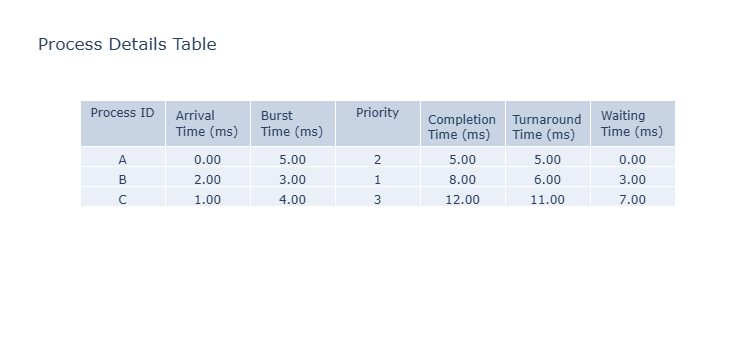

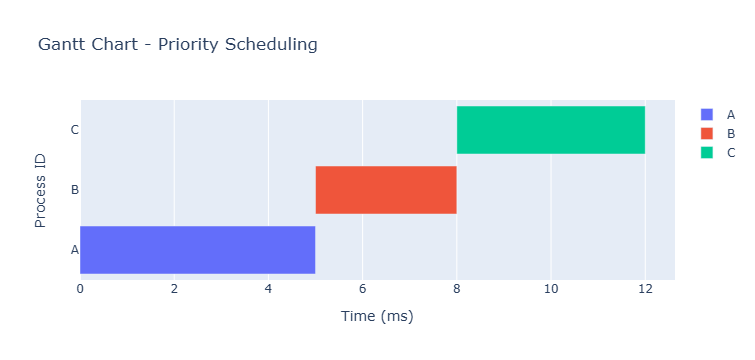

In [80]:
# Run main
main()